# Case Study : Lead Scoring

### Importing required libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Library to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# libraries for model training and model evaluation

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

# VIF from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



## Reading Dataset

In [364]:
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [365]:
#Environment settings
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)



In [366]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Understanding and inspection

In [367]:
leads_df.shape

(9240, 37)

In [368]:
# Check summary of all numerical columns to understand the dataset better in terms of spread 
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [369]:
# Check data types of columns and nulls
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [370]:
# checking number of unique values in each column
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## Checking Data imbalance

In [371]:
leads_df.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [372]:
leads_df.Converted.value_counts(normalize= True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [373]:
# Above results shows data is not imbalanced

In [374]:
leads_df.duplicated().sum()

0

## Data cleaning

### Handling "SELECT" values


In [375]:
# List of columns having 'Select' as value
columns_with_select = [col for col in leads_df.columns if len(leads_df[col].isin(["Select"]).unique())>1]
print(columns_with_select)


['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [376]:
# Converting 'Select' values to NaN.
leads_df = leads_df.replace("Select", np.nan)

In [377]:
# Checking if all 'Select' values have been handled in the columns
columns_with_select = [col for col in leads_df.columns if len(leads_df[col].isin(["Select"]).unique())>1]
print(columns_with_select)

[]


In [378]:
# Calculating Missing Values Percentage
leads_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [379]:
# Calculating Percentage of values more than 40 % missing
(leads_df.isnull().mean()*100)[leads_df.isnull().mean()*100>40]

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [380]:
Column_names = (leads_df.isnull().mean()*100)[leads_df.isnull().mean()*100>40].index
Column_names

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [381]:
Column_names_l = (leads_df.isnull().mean()*100)[leads_df.isnull().mean()*100>40].index.tolist()
Column_names_l

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [382]:
#Dropping values with more than 40 % missing
leads_df.drop(columns= Column_names_l, inplace = True)

In [383]:
(leads_df.isnull().mean()*100).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

## Categorical Variables

In [384]:
# Select the columns with object data type
categorical_cols = leads_df.select_dtypes(include=['object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [385]:
columns_list_1 = ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columns_list_1:
        percen=leads_df[i].value_counts(normalize=True)*100
        print("value_counts % for :",i,"\n")
        print(percen,"\n")
        print("___"*40,"\n")


value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

#### Insights:
-<strong><span>City:</span></strong> This column has 39.71 % missing values. One solution is we can impute the missing values with mode value i.e "Mumbai", but doing this will make the data more skewed, which will create problem in model, so, best solution is dropping this column.

-<strong><span>Specialization:</span></strong> This column has 36.58 % missing values, however the values are evenly distributed. Hence imputation or dropping is not a good choice. Instead we are creating additional category called `'Others'`. 

-<strong><span>Tags:</span></strong> Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. This column is important in modeling , so instead of imputing the values, we are craeting addition category for this coulmn as well called `'Others'` 

-<strong><span>What matters most to you in choosing a course:</span></strong> This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will `not provide any insight`, so dropping it will be the better choice

-<strong><span>What is your current occupation:</span></strong> This variable has 29.11 % missing data. Dropping this variable would not a good choice. We can impute the missing values with `'Unemployed'` as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed. 

-<strong><span>Country:</span></strong> This coulm has 26.63 % missing values and 95.77 % of the cutomers are from India. Since X Education sells online courses. We either can impute the missing values with "India" or we can drop this column. As, imputing this with India does not make business sense. Hence we will drop this variable.

-<strong><span>Last Activity:</span></strong> This variable has only 1.11% missing values and `"Email Opened"` is having highest number of values, hence we will impute the missing values with label `'Email Opened'`.

-<strong><span>Lead Source:</span></strong> Lead Source is having 0.39% missing values and  `"Google"` is having highest number of occurences, hence we will impute the missing values with label 'Google'


### Dropping the columns:
1. City
2. What matters most to you in choosing a course
3. Country

In [386]:
leads_df.drop(['City', 'Country','What matters most to you in choosing a course'],axis=1,inplace=True)

In [387]:
leads_df.shape

(9240, 27)

### Imputing the following columns:
1. Specialization 
2. Tags
3. Lead Source
4. What is your current occupation
5. Last Activity

In [388]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others', 'Tags' :'Others', 'Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
leads_df=leads_df.fillna(value=missing_values)

In [389]:
# Let's check the missing values again
(leads_df.isnull().mean()*100).sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Prospect ID                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Search                                      0.000000
Magazine                                    0.000000
Lead Number                                 0.000000
What is your current occupation             0.000000
Specialization                              0.

### Columns with numerical Data

### Now we will treat the missing values of TotalVisits   and Page Views Per Visit

In [390]:
# TotalVisits
print("TotalVisits : Value Counts")
print()
leads_df.TotalVisits.value_counts().head(10)

TotalVisits : Value Counts



0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [391]:
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].mode()[0], inplace=True)

In [392]:
# Page Views per visit
print("Page Views Per Visit : Value Counts")
print()
leads_df['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit : Value Counts



0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

In [393]:
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].mode()[0], inplace=True)

In [394]:
# Let's check the missing values again
(leads_df.isnull().mean()*100).sort_values(ascending = False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

### Removing columns that does not add much value to the model

### Drop the columns:
1. Prospect ID
2. Lead Number

In [395]:
leads_df.drop(['Prospect ID', 'Lead Number'],axis=1,inplace=True)

In [396]:
leads_df.shape

(9240, 25)

### Handling columns with 1 unique values

In [397]:
leads_df.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,27,1,1,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,Others,No,No,No,No,Modified
freq,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,3353,9240,9240,9240,6352,3407


<strong><span >Following columns have only one unique value </span></strong>
1. Magazine
2. Receive More Updates About Our Courses
3. Update me on Supply Chain Content
4. Get updates on DM Content
5. I agree to pay the amount through cheque

These columns are of no use as they have only one category of response from customer and can be dropped

In [398]:
List_columns_to_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [399]:
leads_df.drop(columns= List_columns_to_drop, inplace = True)

In [400]:
leads_df.shape

(9240, 20)

### Checking and Dropping the coulms which are skewed

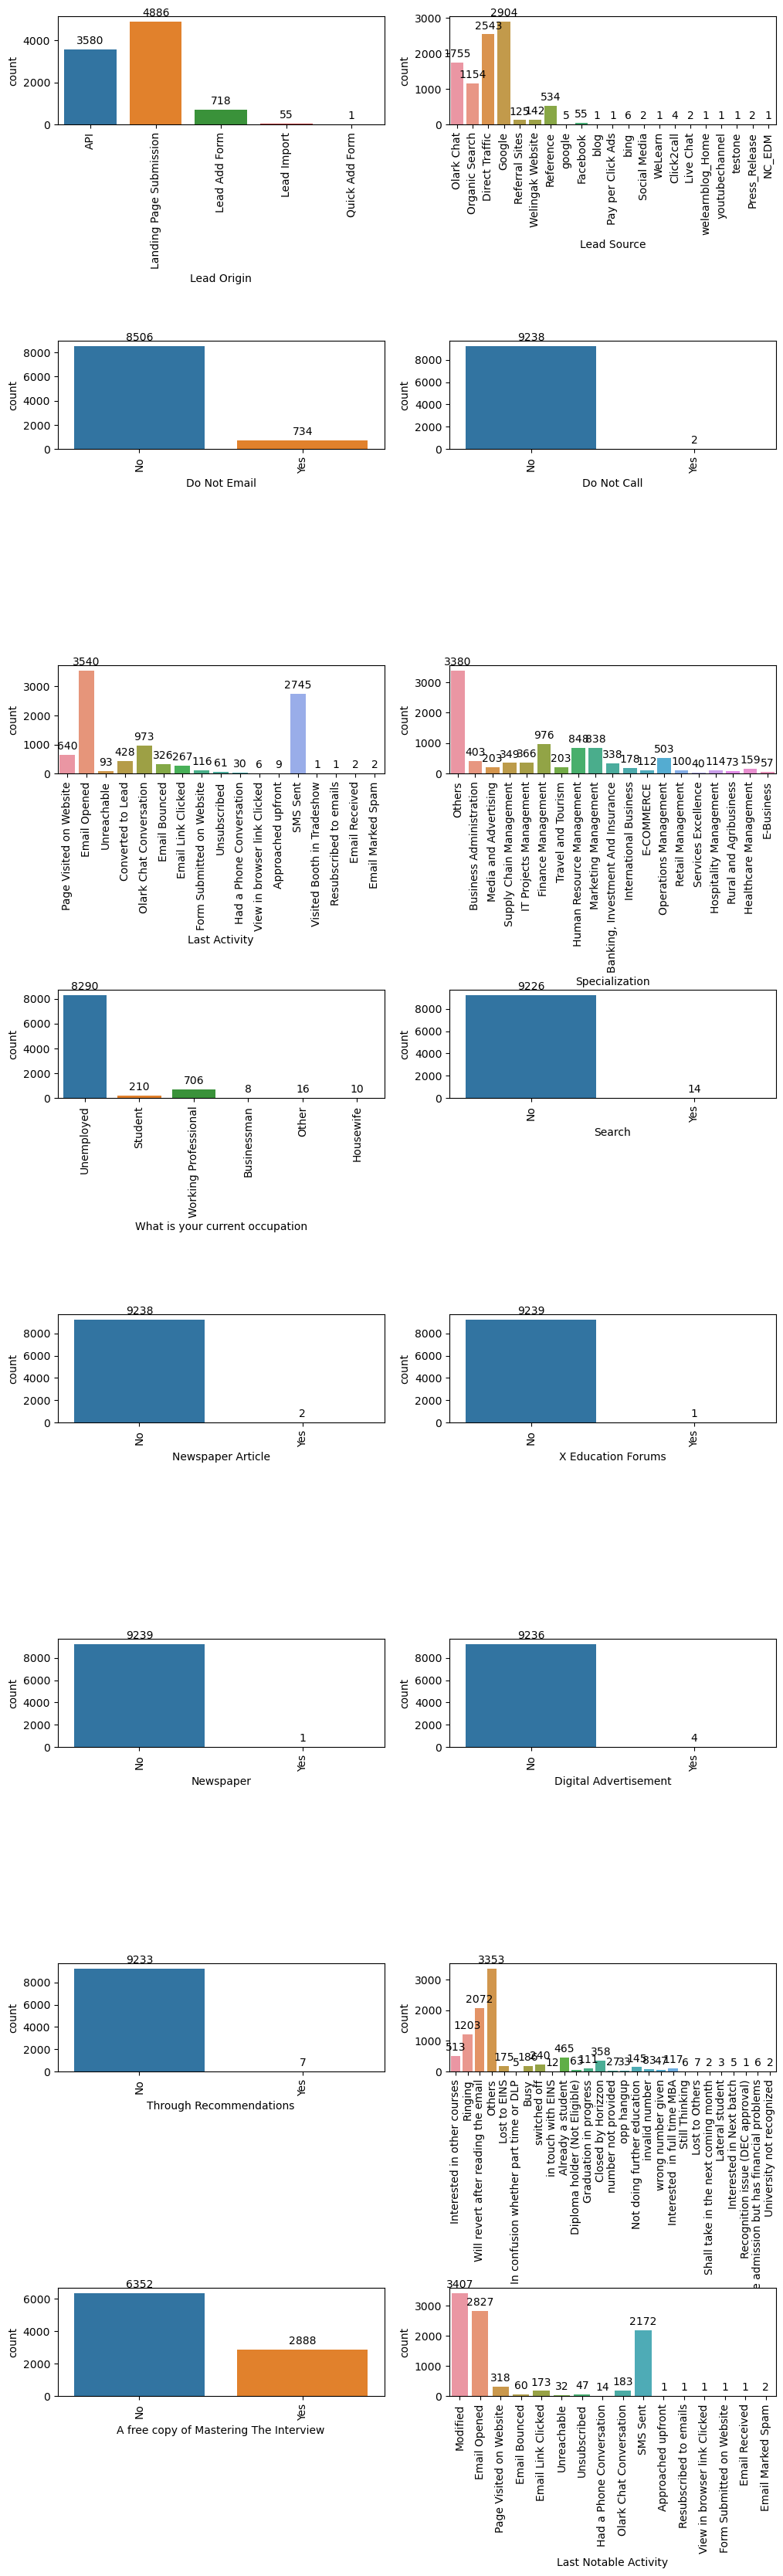

In [401]:
categorical_cols = leads_df.select_dtypes(include=['object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_cols):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=leads_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')


plt.show()

<strong><span>Following columns have data which is highly skewed values, so we will drop these variables as highly skewed varaibles may affect the performance of Logistic Regression Models</span></strong> 
1. Do Not Call
2. Search
3. Newspaper Article
4. X Education Forums
5. Newspaper
6. Digital Advertisement
7. Through Recommendations

In [402]:
cols_to_drop= ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

In [403]:
leads_df.drop(columns= cols_to_drop, inplace = True)

In [404]:
leads_df.shape

(9240, 13)

### Outlier analysis for numerical variables and treatment

In [405]:
def Analysis_Outliers(data,columnList):

    plt.figure(figsize=[15,7])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])    

      
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='green')

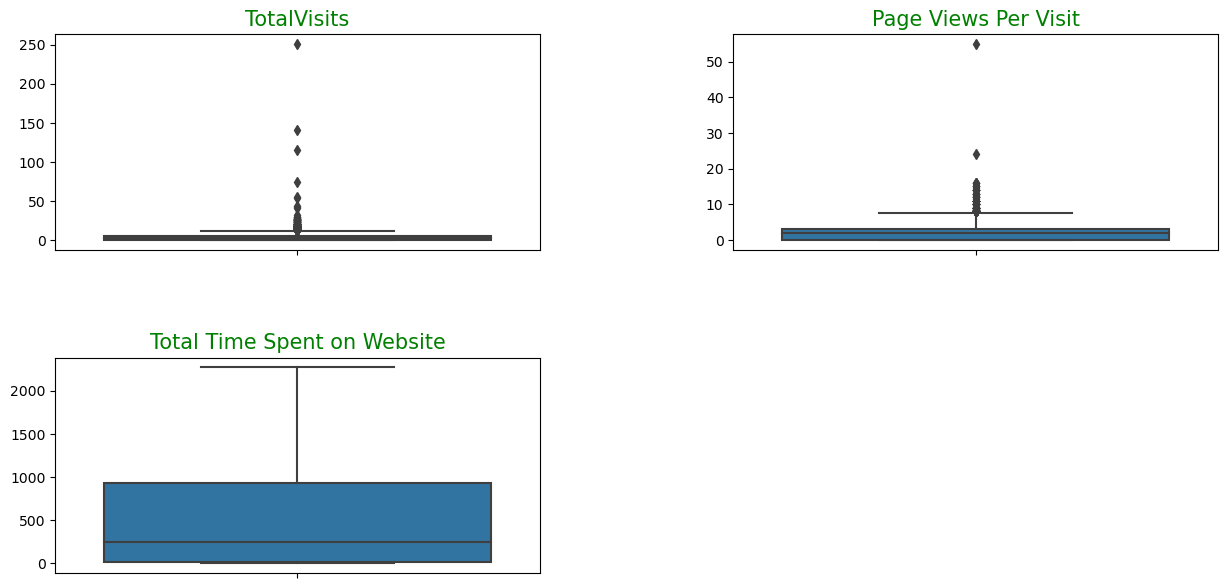

In [406]:
column_list = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

Analysis_Outliers(leads_df,column_list)

"TotalVisits", "Page Views Per Visit" have outliers, So, These outliers needs to be treated 

In [407]:

leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [408]:
def Outlier_treatment(dataframe,col_list):
    for i in col_list:
        q1 = dataframe[i].describe()["25%"]
        q3 = dataframe[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        dataframe[i] = np.where(dataframe[i] > upper_bound, upper_bound,dataframe[i])

        # flooring lower_bound
        dataframe[i] = np.where(dataframe[i] < lower_bound, lower_bound,dataframe[i])

In [409]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

Outlier_treatment(leads_df,capping_cols)

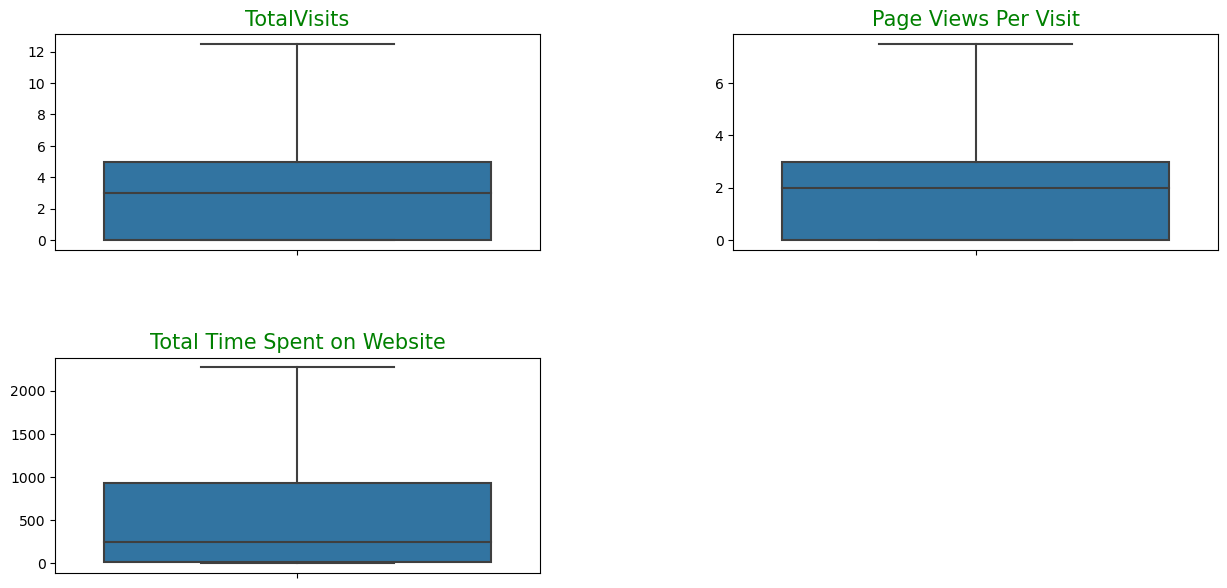

In [410]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]


Analysis_Outliers(leads_df,num_cols)

In [411]:
leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


### Handling Invalid values & Standardising Data 

In [412]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,No,Modified


In [413]:
cat_col_list = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview", "Tags"]

for i in cat_col_list:
        perc=leads_df[i].value_counts(normalize=True)*100
        print("value_counts % for",i,"\n")
        print(perc,"\n")
        print("----"*30,"\n")

value_counts % for Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

------------------------------------------------------------------------------------------------------------------------ 

value_counts % for Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
b

<strong><span>Insights:</span></strong> 

- Some categories/levels in the `"Lead Score" and "Last Activity"` columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we will group these categories together under "Others". 

- Also we can see `"Google"` & `"google"` are same in `"Lead Source"`, so we have to standardise the case.

In [414]:
# Grouping low frequency value levels to Others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace("google","Google")

In [415]:
leads_df["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [416]:
# Grouping low frequency value levels to Others 
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [417]:
leads_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [418]:
# Grouping low frequency value levels to Others 
leads_df['Tags'] = leads_df['Tags'].replace(['Still Thinking','Want to take admission but has financial problems',
                                                               'In confusion whether part time or DLP ', 
                                                               'Interested in Next batch',
                                                               'Lateral student',       
                                                               'Shall take in the next coming month',                  
                                                               'University not recognized','Recognition issue (DEC approval)',
                                                               'Lost to Others', 'In confusion whether part time or DLP'],'Others')                                     


In [419]:
leads_df['Tags'].value_counts(normalize=True)*100

Others                                 36.688312
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Busy                                    2.012987
Lost to EINS                            1.893939
Not doing further education             1.569264
Interested  in full time MBA            1.266234
Graduation in progress                  1.201299
invalid number                          0.898268
Diploma holder (Not Eligible)           0.681818
wrong number given                      0.508658
opp hangup                              0.357143
number not provided                     0.292208
in touch with EINS                      0.129870
Name: Tags, dtype: float64

####  Mapping Binary categorical variables

In [420]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leads_df['Do Not Email'] = leads_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [421]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

## Univarate Categorical Analysis

In [422]:
#List of categorical columns
cat_cols = ["Lead Origin","What is your current occupation","Do Not Email",
            "A free copy of Mastering The Interview","Lead Source","Last Activity","Specialization", 'Tags']

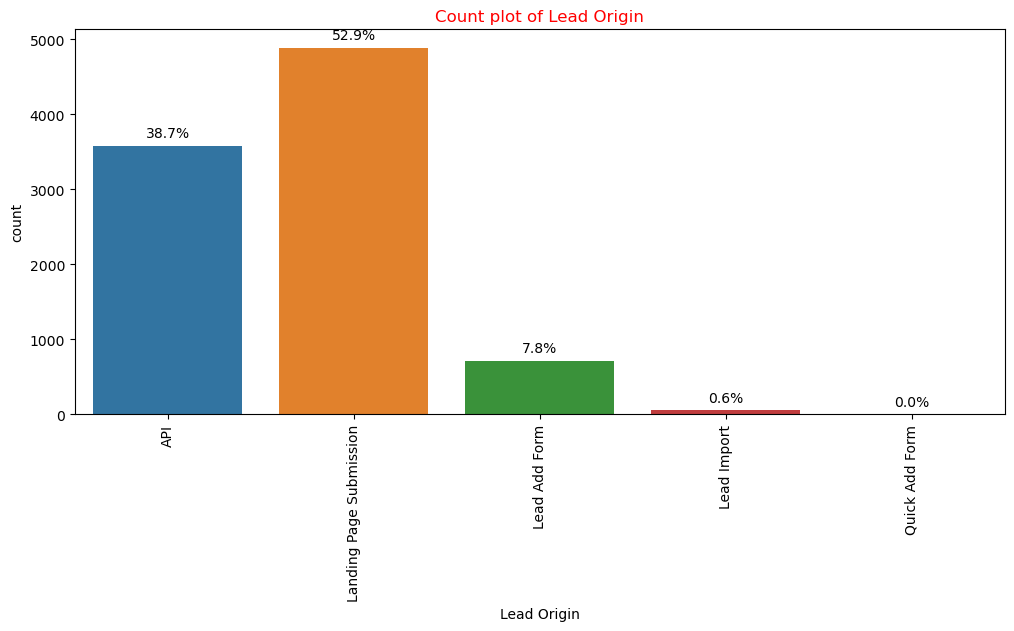

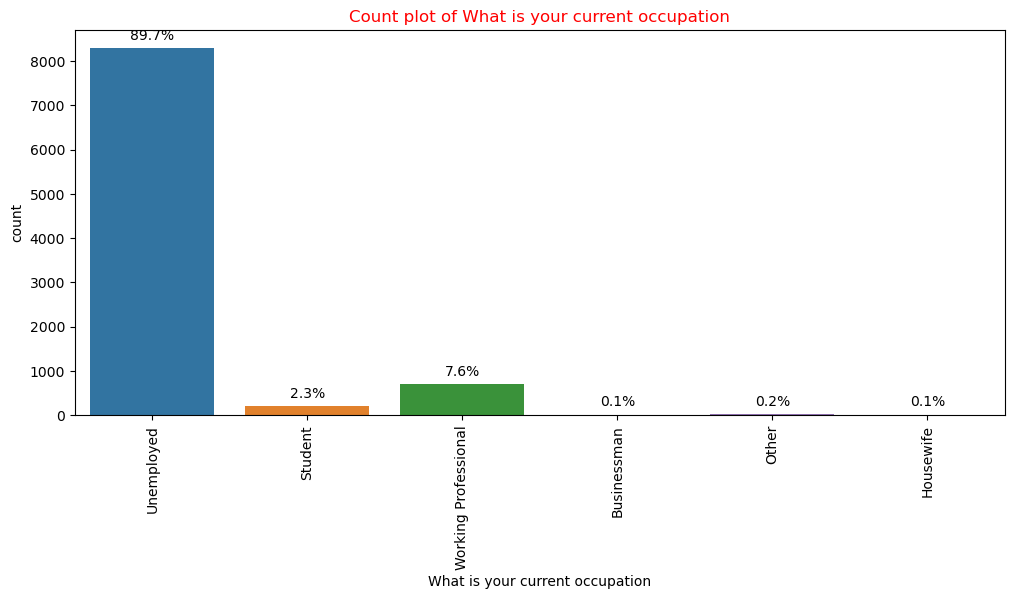

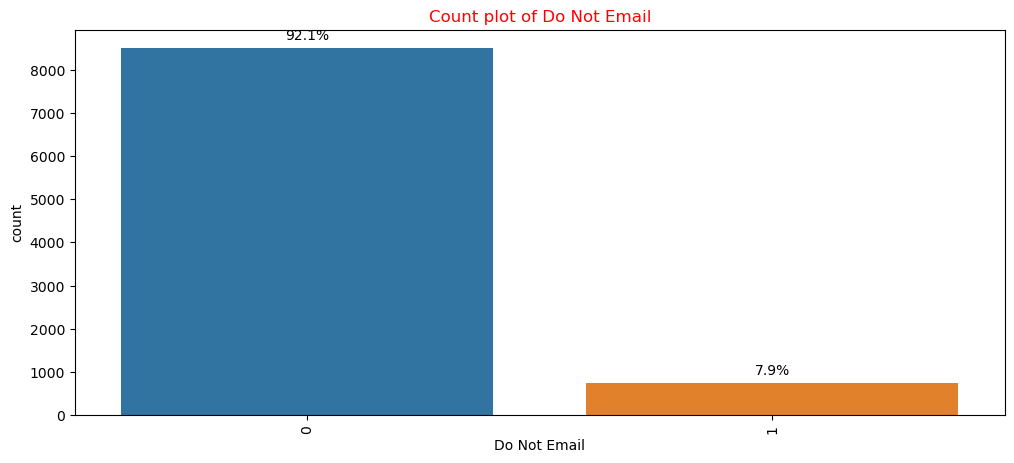

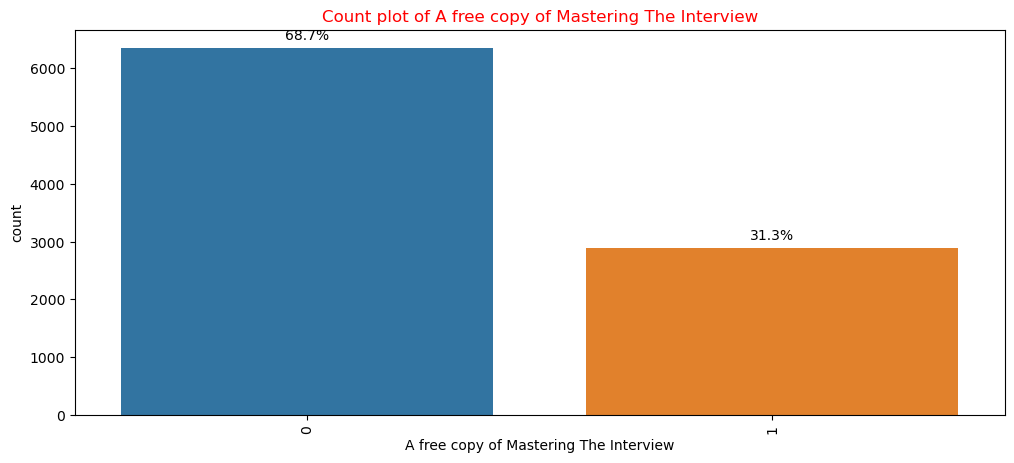

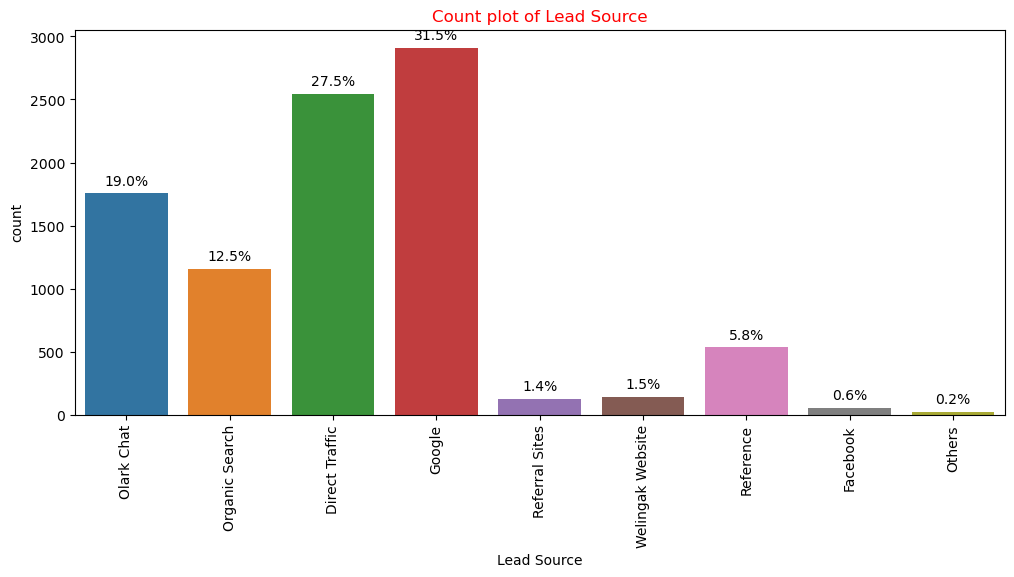

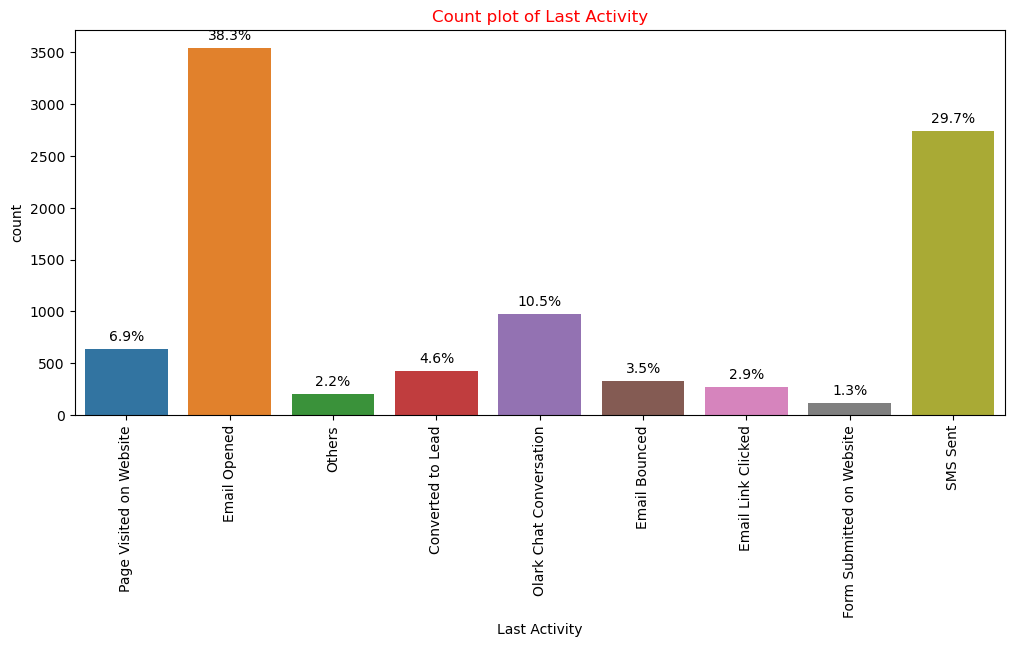

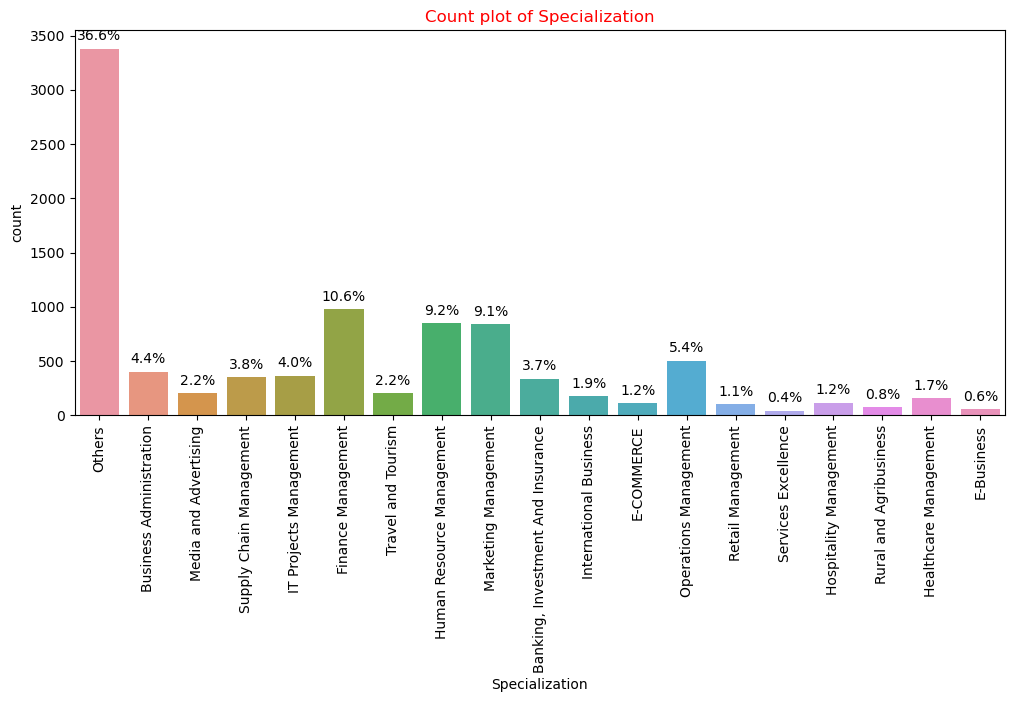

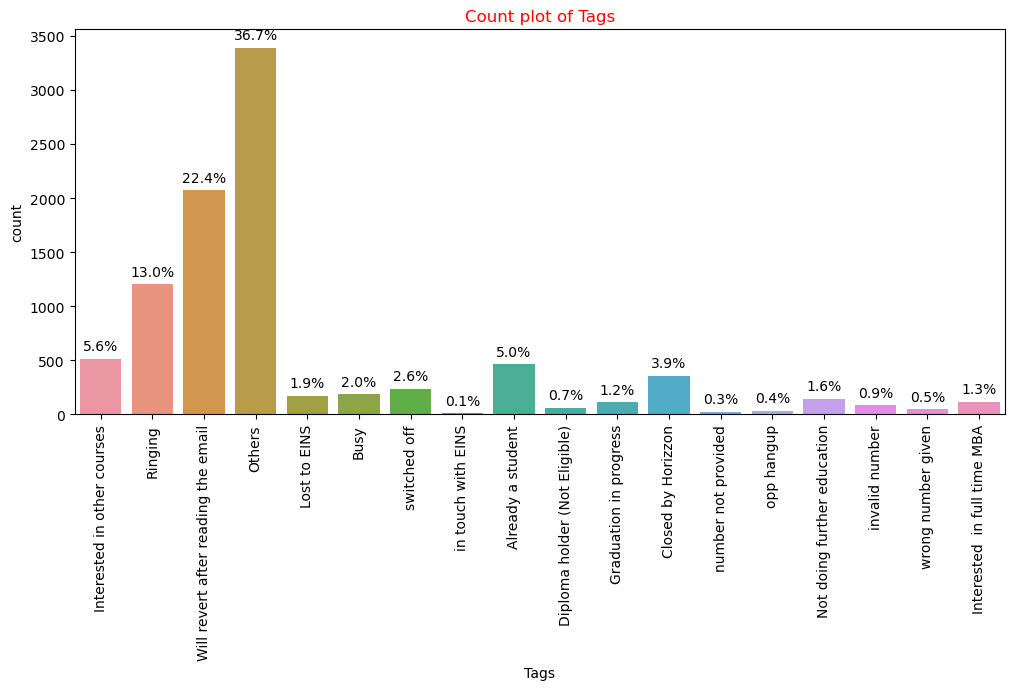

In [423]:
for i in cat_cols:
    
    plt.figure(figsize=[12,5])
    plt.title("Count plot of {}".format(i),color="red")
    ax=sns.countplot(x=i,data=leads_df)
    total=len(leads_df[i])
    plt.xticks(rotation=90)
    
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

<strong><span>Insights:</span></strong> 

- **Lead Origin:** "Landing Page Submission" identified 52.9% customers, "API" identified 38.7%. 

- **Current_occupation:** It has 89.7% of the customers as Unemployed

- **Do Not Email:** 92.1% of the people has opted that they dont want to be emailed about the course.

- **Lead Source:** 31.5% Lead source is from Google, followed by Direct Traffic as 27.5%

- **Last Activity:** 38.3% of customers opened email as last activity followed by SMS Sent as 29.7%

- **Specilization:** Almost evenly distributed and More percent is for Others

- **Tags:** Apart from others, will revert after reading the email contributes 22.4 %


## Bivariate Analysis

In [424]:
def Bivariate_ana(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Red", fontsize=18)
    
    # 1st plot in subplot
#     plt.subplot(1,2,1)
#     plt.title("Distribution of {}".format(variable_name),color="Green")
#     ax=sns.countplot(x=variable_name,hue=Target,data=leads_df,palette="prism_r",alpha=0.46)
    
#     total=len(leads_df[variable_name])
#     plt.xticks(rotation=90)
#     plt.legend(["No","Yes"],title = "Converted")

    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="Green")
    ax=sns.countplot(x=variable_name,data=leads_df)
    
    total=len(leads_df[variable_name])
    plt.xticks(rotation=90)
        
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=leads_df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


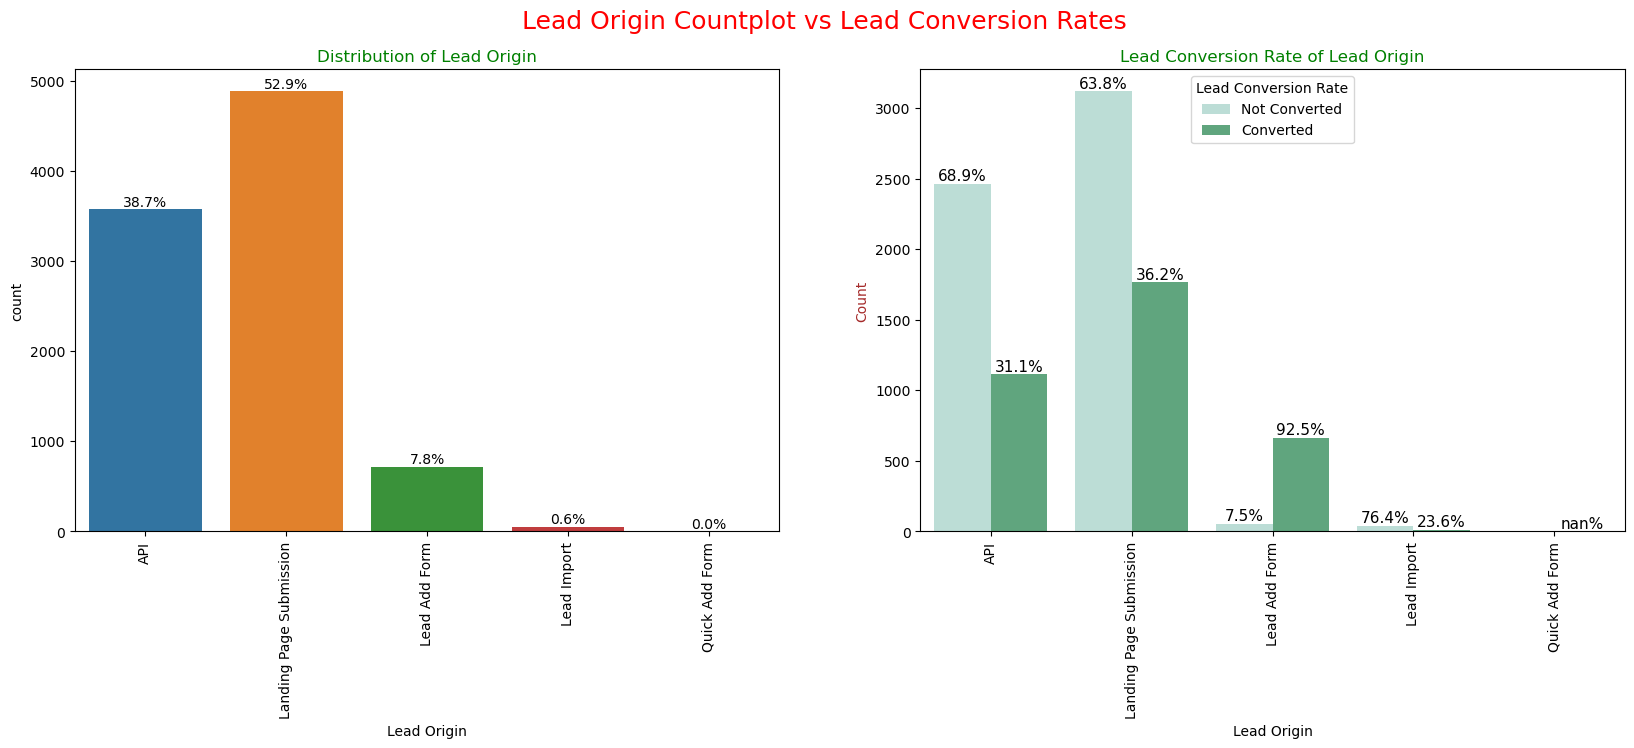

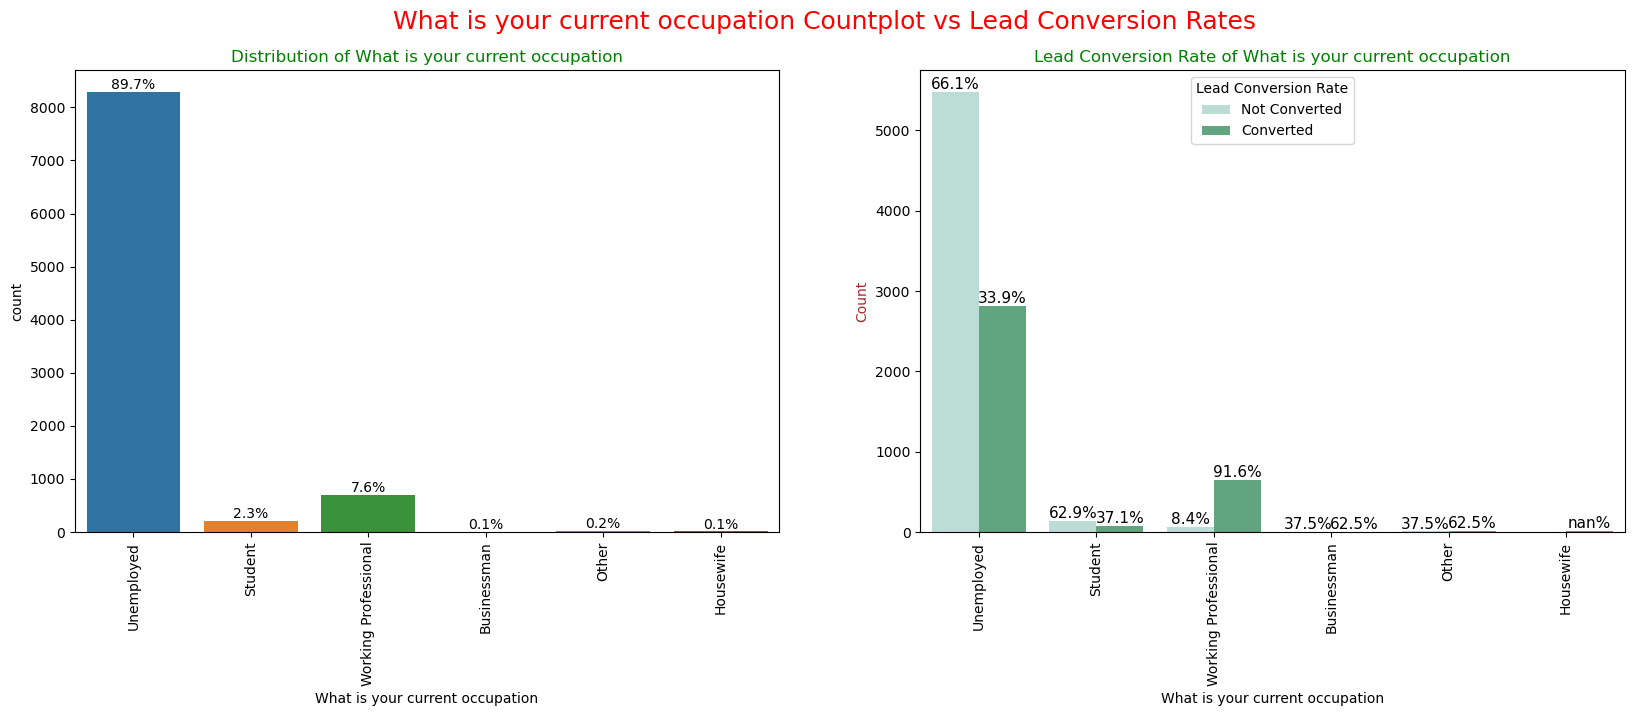

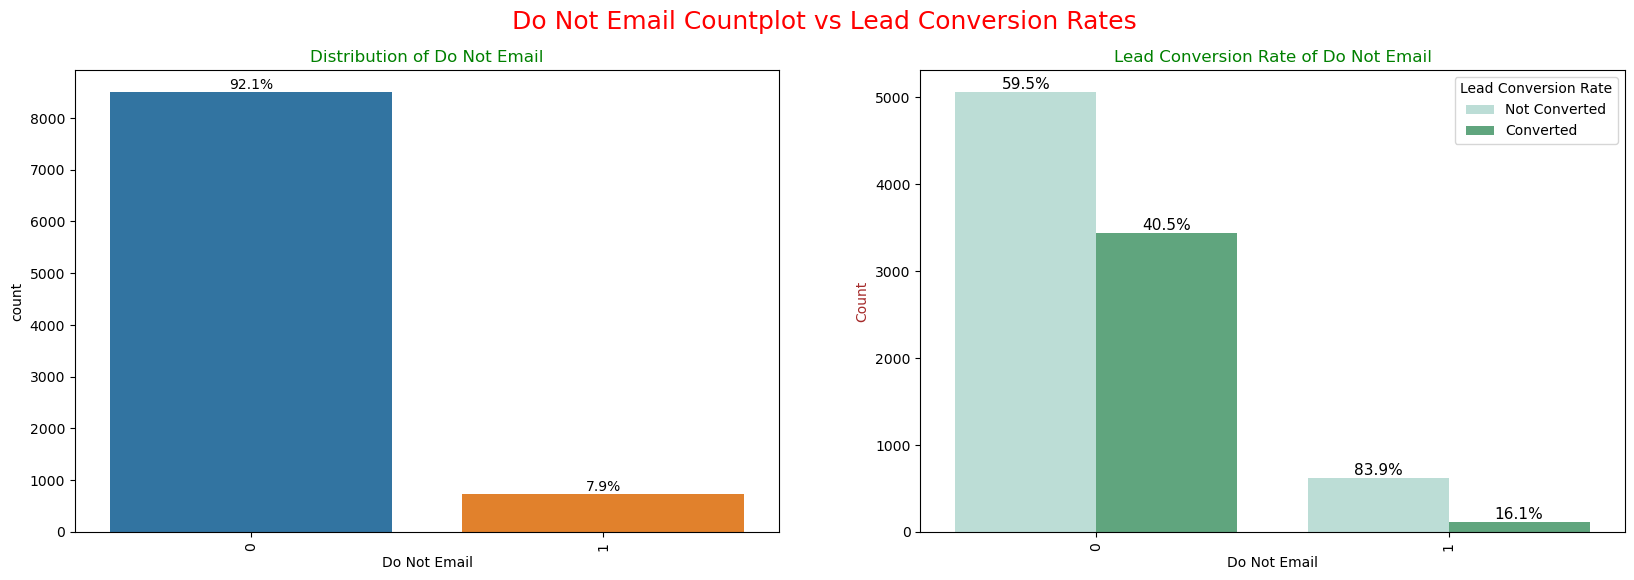

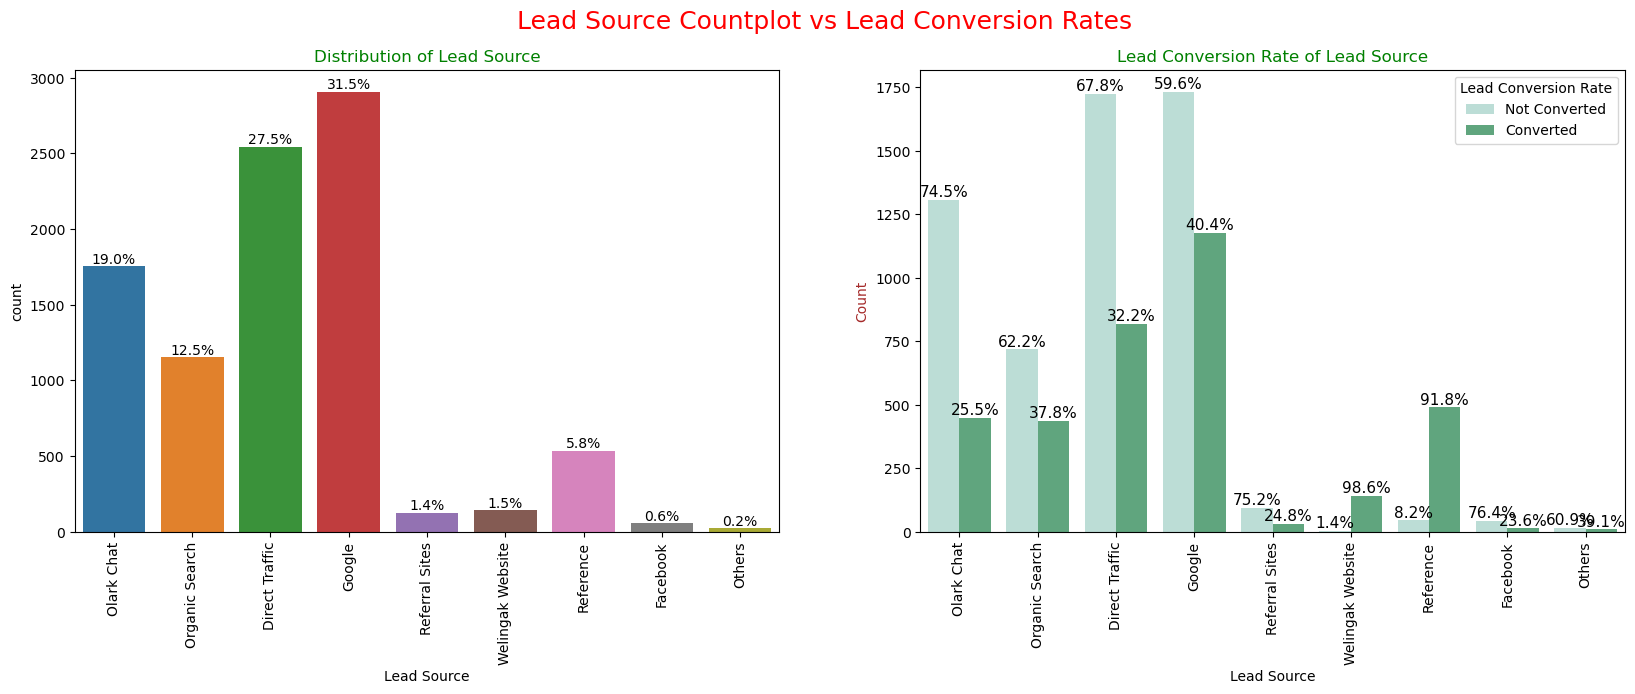

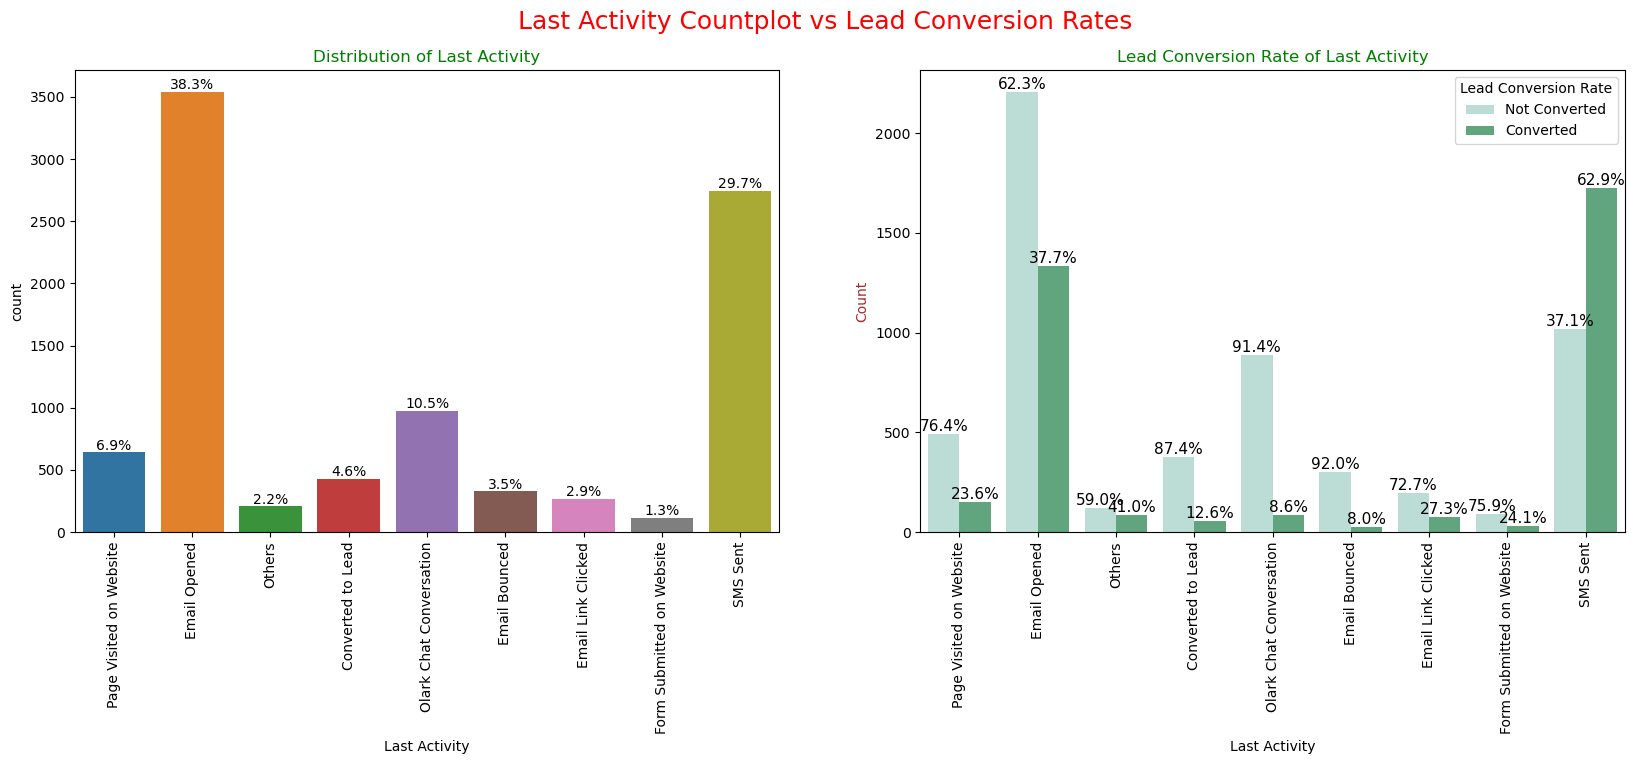

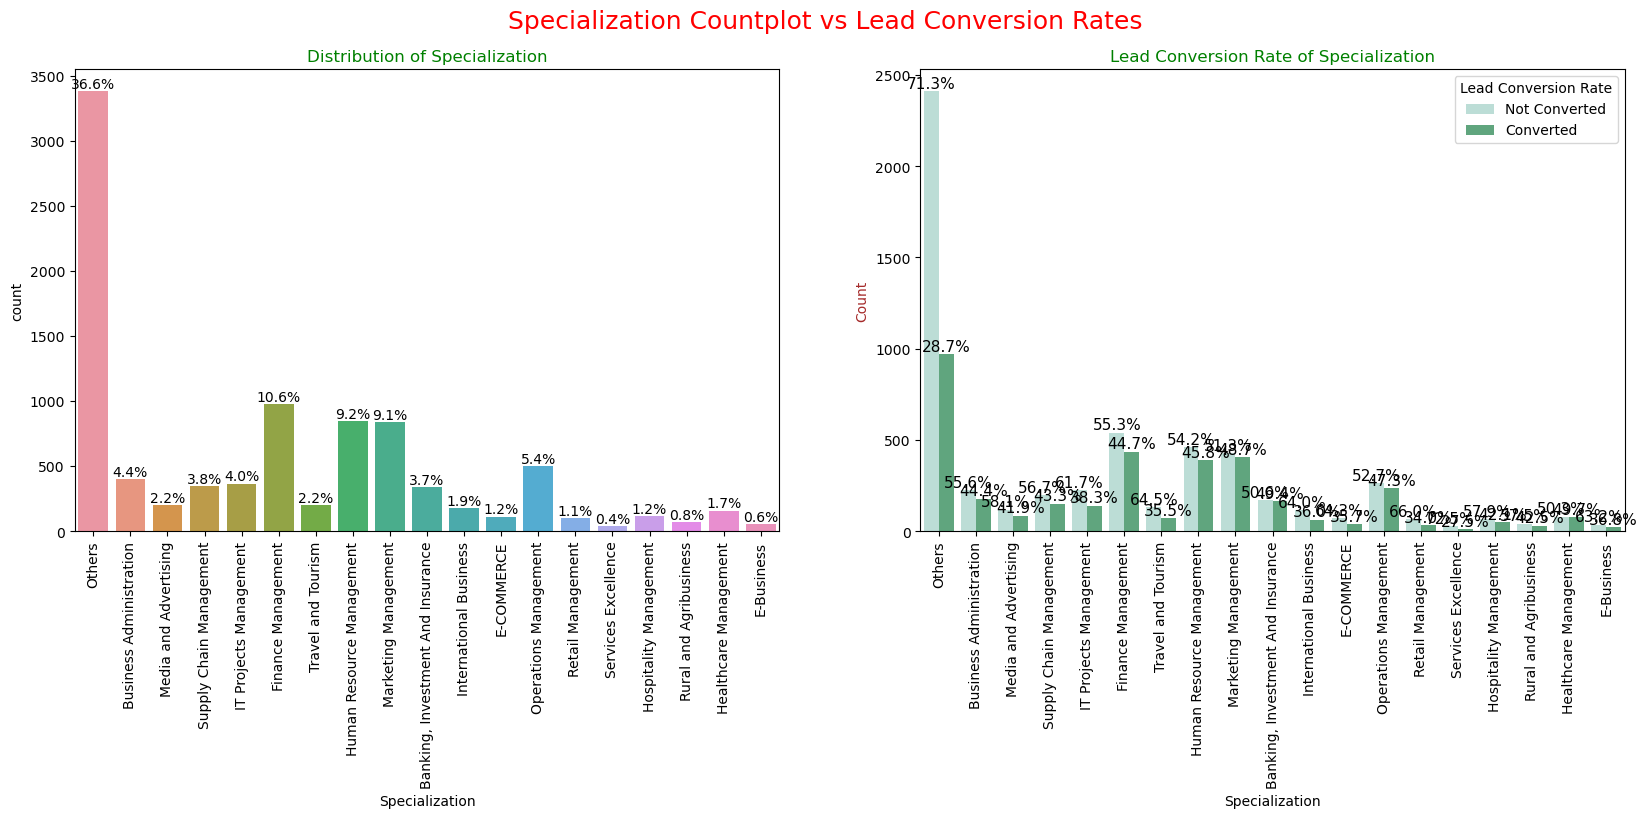

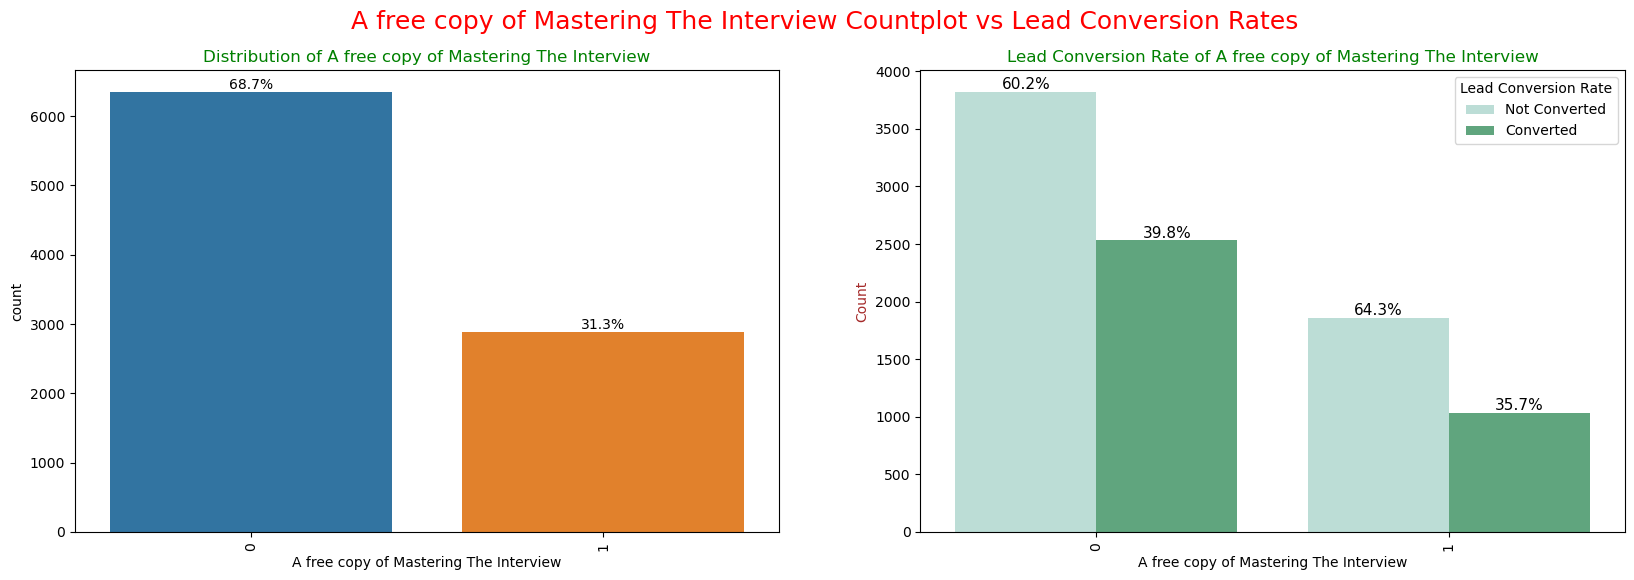

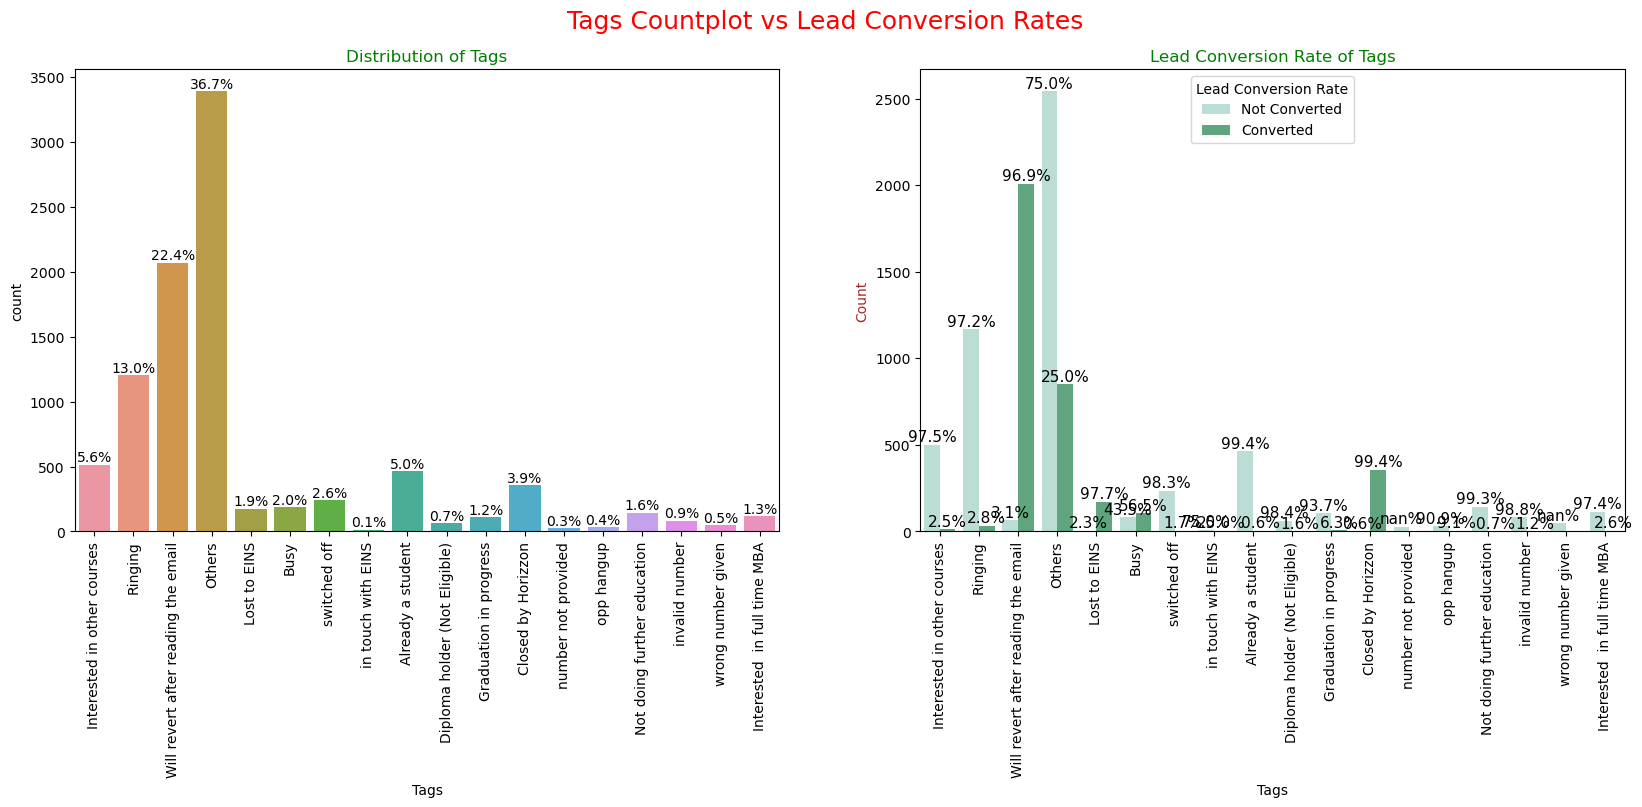

In [425]:
cat_var = ["Lead Origin","What is your current occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","A free copy of Mastering The Interview", "Tags"]

for i in cat_var:
    Bivariate_ana(leads_df,variable_name=i)
    

<strong><span>Insights:</span></strong> 

- <strong><span >Lead Origin:</span></strong> 52.9% of leads originated from **Landing Page Submission** with a lead conversion rate  of 36.2% .The **API** identified 38.7% of customers with a lead conversion rate of 31.1%.

- <strong><span>Current_occupation:</span></strong> 89.7% of the customers are **Unemployed** with lead conversion rate of 33.9%. 
- <strong><span >Do Not Email:</span></strong> 92.1% of the people has mentioned that they dont want to be emailed about the course. 

- <strong><span>Lead Source:</span></strong> Google has lead conversion rate of 40.4% out of 31.5% customers,Direct Traffic has lead conversion rate as 32.2% out of 27.5% customers, Organic Search has 37.8% of lead conversion rate out of 12.5% of customers, Olark Chat has 25.% of lead conversion rate out of 19% of customers, however Reference has 91.8% of lead conversion rate but there are only 5.8% of customers through this Lead Source.

- <strong><span>Last Activity:</span></strong> SMS Sent has 62.9% lead conversion rate with 29.7% contribution from last activities and Email Opened activity contributed 38.3% of last activities performed by the customers with 37.7% lead conversion rate.

- <strong><span >Specialization:</span></strong> Marketing Managemt,HR Management,Finance Management shows good contribution.

- <strong><span >A free copy of Mastering The Interview:</span></strong> 68.7% cutomers mentioned that they does not need free copy of mastering the Interview

- <strong><span >Tags:</span></strong> 22.4% cutomers mentioned that they will revert after reading the email and 96.9 % of them converted into leads.

 ## Bivariate Analysis for Numerical Variables

In [426]:
num_cols =['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

<Figure size 1600x400 with 0 Axes>

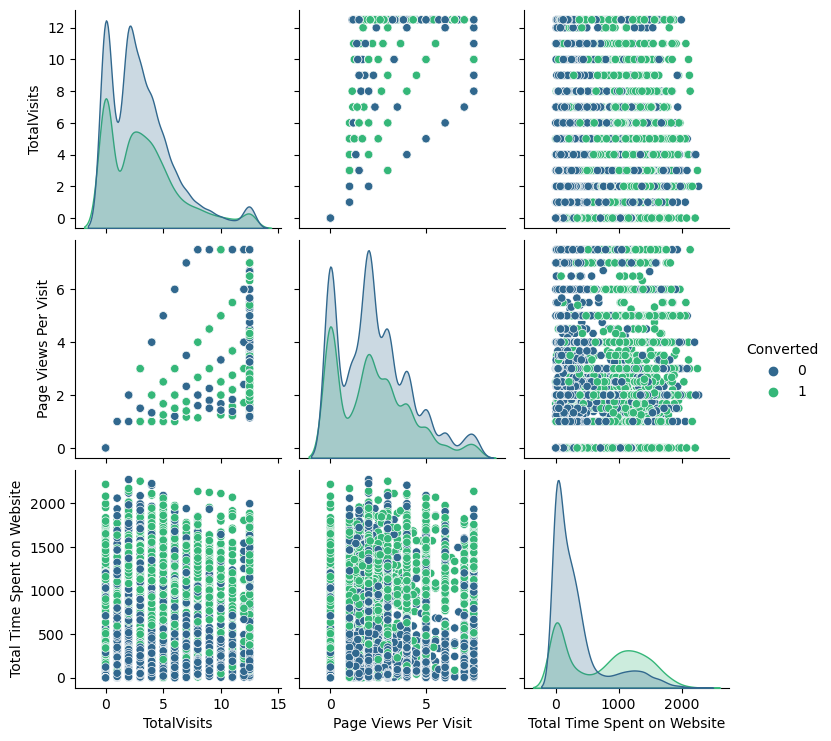

In [427]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=leads_df,vars=num_cols,hue="Converted", palette="viridis")                                  
plt.show()

In [428]:
num_cols_1 =['Converted','TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

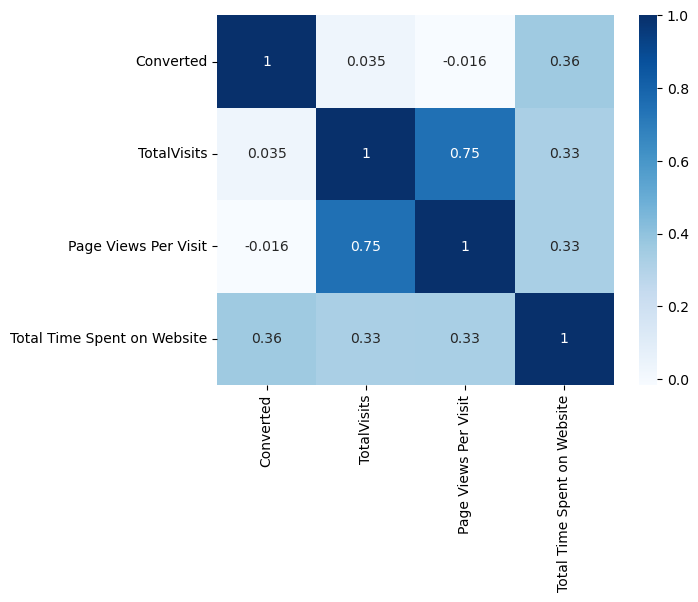

In [429]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=leads_df[num_cols_1].corr(),cmap="Blues",annot=True)
plt.show()

### Insights: 
Total Time spent on Website has strong positive relation with lead conversion

## Data Preparation

### Dummy Variables
- For categorical variables with multiple levels, create dummy features

In [430]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,0,Modified


In [431]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_var = pd.get_dummies(leads_df[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation", "Tags", "Last Notable Activity"]], drop_first=True)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy_var], axis=1)

In [432]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [433]:
leads_df.shape

(9240, 88)

In [434]:
# We have created dummies for the below variables, so we can drop them

leads_df = leads_df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation", "Tags", "Last Notable Activity"],1)

In [435]:
leads_df.shape

(9240, 81)

In [436]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

## Test-Train Split 

In [437]:
# Putting predictor variables to X
X = leads_df.drop('Converted', axis=1)


In [438]:
# Putting Target variables to y
y = leads_df["Converted"]

In [439]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [440]:
print(X_train.shape)
print(y_train.shape)

(6468, 80)
(6468,)


In [441]:
print(X_test.shape)
print(y_test.shape)

(2772, 80)
(2772,)


## Feature Scaling 

In [442]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [443]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4715,-0.291638,-1.073145,-0.887525,-1.192151,-0.679238,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7132,-0.291638,-0.412166,1.386983,-0.669483,-0.679238,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8954,-0.291638,0.248812,-0.182209,-0.497003,1.472237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5283,3.428906,3.057971,1.315905,2.727857,-0.679238,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3003,-0.291638,-0.081677,1.580170,0.375852,1.472237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [444]:
LCR = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
LCR

38.53896103896104

In [445]:
# Logistic Regression Model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1198.5
Date:                Mon, 27 Nov 2023   Deviance:                       2397.0
Time:                        15:35:11   Pearson chi2:                 1.01e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6177
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   16.8549   2.16e+05    7.8e-05      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -0.1981      0.083     -2.392      0.017      -0.360      -0.036
TotalVisits                                              0.2916      0.085      3.427      0.001       0.125       0.458
Total Time Spent on Website                              1.0627      0.064     16.704      0.000       0.938       1.187
Page Views Per Visit                                    -0.3157      0.097     -3.256      0.001      -0.506      -0.126
A free copy of Mastering The Interview                  -0.0939      0.084     -1.117      0.264      -0.259       0.071
Lead Origin_Landing Page Submission                     -0.5189      0.234     -2.220      0.026      -0.977      -0.061
Lead Origin_Lead Add Form                                1.7987      0.842      2.136      0.033       0.148       3.449
Lead Origin_Lead Import                                 22.6434   3.22e+04      0.001      0.999   -6.32e+04    6.32e+04
Lead Origin_Quick Add Form                              26.0093   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -22.8323   3.22e+04     -0.001      0.999   -6.32e+04    6.32e+04
Lead Source_Google                                       0.0832      0.188      0.444      0.657      -0.284       0.451
Lead Source_Olark Chat                                   0.7308      0.253      2.890      0.004       0.235       1.226
Lead Source_Organic Search                               0.0808      0.220      0.368      0.713      -0.350       0.511
Lead Source_Others                                       0.1641      1.125      0.146      0.884      -2.041       2.369
Lead Source_Reference                                   -1.4665      0.928     -1.580      0.114      -3.286       0.353
Lead Source_Referral Sites                              -0.2805      0.496     -0.565      0.572      -1.253       0.692
Lead Source_Welingak Website                            24.4971   1.92e+04      0.001      0.999   -3.76e+04    3.76e+04
Last Activity_Email Bounced                             -0.4605      0.747     -0.616      0.538      -1.925       1.004
Last Activity_Email Link Clicked                         1.2788      0.727      1.758      0.079      -0.147       2.704
Last Activity_Email Opened                               1.0267      0.417      2.463      0.014       0.210       1.844
Last Activity_Form Submitted on Website                  0.9213      0.624      1.477      0.140      -0.302       2.144
Last Activity_Olark Chat Conversation                    0

## Feature Selection Using RFE (Recursive Feature Elimination)

In [446]:
logreg=LogisticRegression()
rfe=RFE(logreg, n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [447]:
rfe.support_

array([False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False])

In [448]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 39),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 54),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 55),
 ('Lead Source_Others', False, 53),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Others', False, 11),
 ('Last Activity_Pag

In [449]:
top20=pd.DataFrame()
top20['features']=X_train.columns
top20['Feature Chosen'] = rfe.support_
top20['Ranking']=rfe.ranking_
top20.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
56,Tags_Others,True,1
58,Tags_Will revert after reading the email,True,1
59,Tags_in touch with EINS,True,1
60,Tags_invalid number,True,1
61,Tags_number not provided,True,1
63,Tags_switched off,True,1
64,Tags_wrong number given,True,1
71,Last Notable Activity_Had a Phone Conversation,True,1
57,Tags_Ringing,True,1
48,Tags_Busy,True,1


In [450]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [451]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
      

In [452]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

## Model 1

In [453]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                             -3.034516
Total Time Spent on Website                        0.947151
Lead Origin_Landing Page Submission               -0.912045
Lead Origin_Lead Add Form                          0.311906
Lead Source_Welingak Website                      25.501925
Last Activity_SMS Sent                             1.342324
Tags_Busy                                          2.732793
Tags_Closed by Horizzon                            8.931755
Tags_Lost to EINS                                  8.156346
Tags_Others                                        2.076862
Tags_Ringing                                      -1.237236
Tags_Will revert after reading the email           6.661001
Tags_in touch with EINS                            2.526755
Tags_invalid number                               -1.858406
Tags_number not provided                         -23.291548
Tags_switched off                                 -2.178809
Tags_wrong number given                 

In [454]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.2
Date:                Mon, 27 Nov 2023   Deviance:                       2496.3
Time:                        15:35:18   Pearson chi2:                 9.52e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6117
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [455]:
# Now checking VIFs for all variables in the Model 1 
get_vif(X_train_rfe)

,Features,VIF
0,Last Notable Activity_SMS Sent,5.92
1,Last Activity_SMS Sent,5.72
2,Lead Origin_Landing Page Submission,2.14
3,Tags_Will revert after reading the email,1.91
4,Last Notable Activity_Modified,1.78
5,Lead Origin_Lead Add Form,1.76
6,Tags_Others,1.68
7,Tags_Ringing,1.35
8,Tags_Closed by Horizzon,1.32
9,Lead Source_Welingak Website,1.24


<strong><span>Insight : </span></strong> "Last Notable Activity_SMS Sent" and "Last Activity_SMS Sent" columns ahve VIF > 5, So, we will drop varaibles One by one and see the impact on other variables

## Model 2

In [456]:
# Dropping 'Last Notable Activity_SMS Sent' column
rfe_col=rfe_col.drop("Last Notable Activity_SMS Sent")

In [457]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                             -2.940191
Total Time Spent on Website                        0.942716
Lead Origin_Landing Page Submission               -0.936974
Lead Origin_Lead Add Form                          0.314675
Lead Source_Welingak Website                      25.420452
Last Activity_SMS Sent                             2.026238
Tags_Busy                                          2.754531
Tags_Closed by Horizzon                            9.098737
Tags_Lost to EINS                                  8.325701
Tags_Others                                        2.072987
Tags_Ringing                                      -1.122945
Tags_Will revert after reading the email           6.731871
Tags_in touch with EINS                            2.493415
Tags_invalid number                               -1.706155
Tags_number not provided                         -23.137529
Tags_switched off                                 -2.047030
Tags_wrong number given                 

In [458]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.1
Date:                Mon, 27 Nov 2023   Deviance:                       2510.1
Time:                        15:35:20   Pearson chi2:                 9.69e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6109
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [459]:
# Now checking VIFs for all variables in the Model 2
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.14
1,Tags_Will revert after reading the email,1.84
2,Lead Origin_Lead Add Form,1.76
3,Last Activity_SMS Sent,1.65
4,Tags_Others,1.65
5,Last Notable Activity_Modified,1.48
6,Tags_Ringing,1.33
7,Tags_Closed by Horizzon,1.32
8,Lead Source_Welingak Website,1.24
9,Total Time Spent on Website,1.22


<strong><span>Insight : </span></strong> VIF for all variables is <5, however, p- value for "Tags_number not provided " column is 1.000 which is above the accepted threshold of 0.05 for statistical significance, this variable needs to be dropped

## Model 3

In [460]:
# Dropping 'Tags_number not provided' column
rfe_col=rfe_col.drop("Tags_number not provided")

In [461]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                             -3.020149
Total Time Spent on Website                        0.940984
Lead Origin_Landing Page Submission               -0.941019
Lead Origin_Lead Add Form                          0.313658
Lead Source_Welingak Website                      25.417997
Last Activity_SMS Sent                             2.013294
Tags_Busy                                          2.843843
Tags_Closed by Horizzon                            9.174471
Tags_Lost to EINS                                  8.402318
Tags_Others                                        2.157731
Tags_Ringing                                      -1.029992
Tags_Will revert after reading the email           6.812105
Tags_in touch with EINS                            2.573558
Tags_invalid number                               -1.610421
Tags_switched off                                 -1.952692
Tags_wrong number given                          -22.861601
Last Notable Activity_Had a Phone Conver

In [462]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1257.1
Date:                Mon, 27 Nov 2023   Deviance:                       2514.2
Time:                        15:35:22   Pearson chi2:                 9.65e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6107
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [463]:
# Now checking VIFs for all variables in the Model 3
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.12
1,Tags_Will revert after reading the email,1.83
2,Lead Origin_Lead Add Form,1.76
3,Last Activity_SMS Sent,1.65
4,Tags_Others,1.65
5,Last Notable Activity_Modified,1.48
6,Tags_Ringing,1.32
7,Tags_Closed by Horizzon,1.32
8,Lead Source_Welingak Website,1.24
9,Total Time Spent on Website,1.22


<strong><span>Insight : </span></strong> "Lead Source_Welingak Website" column will be removed from model due to high p-value of .998, which is above the accepted threshold of 0.05 for statistical significance, however VIF for all variables is <5

## Model 4

In [464]:
# Dropping 'Lead Source_Welingak Website' column
rfe_col=rfe_col.drop("Lead Source_Welingak Website")

In [465]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                             -3.041301
Total Time Spent on Website                        0.936614
Lead Origin_Landing Page Submission               -0.911581
Lead Origin_Lead Add Form                          1.992371
Last Activity_SMS Sent                             1.991821
Tags_Busy                                          2.847426
Tags_Closed by Horizzon                            8.780795
Tags_Lost to EINS                                  8.380161
Tags_Others                                        2.211113
Tags_Ringing                                      -1.113864
Tags_Will revert after reading the email           6.694064
Tags_in touch with EINS                            2.600084
Tags_invalid number                               -1.588682
Tags_switched off                                 -1.932792
Tags_wrong number given                          -20.842471
Last Notable Activity_Had a Phone Conversation     2.234551
Last Notable Activity_Modified          

In [466]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1283.9
Date:                Mon, 27 Nov 2023   Deviance:                       2567.7
Time:                        15:35:24   Pearson chi2:                 1.12e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6074
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [467]:
# Now checking VIFs for all variables in the Model 3
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.12
1,Tags_Will revert after reading the email,1.80
2,Last Activity_SMS Sent,1.65
3,Tags_Others,1.64
4,Lead Origin_Lead Add Form,1.49
5,Last Notable Activity_Modified,1.48
6,Tags_Ringing,1.32
7,Tags_Closed by Horizzon,1.31
8,Total Time Spent on Website,1.22
9,Tags_Lost to EINS,1.08


<strong><span>Insight : </span></strong> "Tags_wrong number given " column will be removed from model due to high p-value of .999, which is above the accepted threshold of 0.05 for statistical significance.

## Model 5

In [468]:
# Dropping 'Tags_wrong number given  column
rfe_col=rfe_col.drop("Tags_wrong number given")

In [469]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit()  

logm5.params

const                                            -3.156314
Total Time Spent on Website                       0.936222
Lead Origin_Landing Page Submission              -0.917276
Lead Origin_Lead Add Form                         1.992709
Last Activity_SMS Sent                            1.977815
Tags_Busy                                         2.973234
Tags_Closed by Horizzon                           8.893208
Tags_Lost to EINS                                 8.492992
Tags_Others                                       2.331627
Tags_Ringing                                     -0.984978
Tags_Will revert after reading the email          6.810735
Tags_in touch with EINS                           2.715643
Tags_invalid number                              -1.457062
Tags_switched off                                -1.802135
Last Notable Activity_Had a Phone Conversation    2.234836
Last Notable Activity_Modified                   -1.752749
Last Notable Activity_Olark Chat Conversation    -1.8914

In [470]:
#Let's see the summary of our logistic regression model
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.5
Date:                Mon, 27 Nov 2023   Deviance:                       2573.1
Time:                        15:35:26   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [471]:
# Now checking VIFs for all variables in the Model 3
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.10
1,Tags_Will revert after reading the email,1.79
2,Last Activity_SMS Sent,1.64
3,Tags_Others,1.63
4,Lead Origin_Lead Add Form,1.49
5,Last Notable Activity_Modified,1.48
6,Tags_Ringing,1.32
7,Tags_Closed by Horizzon,1.31
8,Total Time Spent on Website,1.22
9,Tags_Lost to EINS,1.08


<strong><span>Insight : </span></strong> "Tags_invalid number " column will be removed from model due to high p-value of .194, which is above the accepted threshold of 0.05 for statistical significance.

## Model 6

In [472]:
# Dropping 'Tags_invalid number' column
rfe_col=rfe_col.drop("Tags_invalid number")

In [473]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm6 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm6 = sm.GLM(y_train,X_train_sm6,family = sm.families.Binomial()).fit()  

logm6.params

const                                            -3.249797
Total Time Spent on Website                       0.936245
Lead Origin_Landing Page Submission              -0.919662
Lead Origin_Lead Add Form                         1.994238
Last Activity_SMS Sent                            1.965455
Tags_Busy                                         3.074268
Tags_Closed by Horizzon                           8.983188
Tags_Lost to EINS                                 8.583291
Tags_Others                                       2.428976
Tags_Ringing                                     -0.881096
Tags_Will revert after reading the email          6.904203
Tags_in touch with EINS                           2.809265
Tags_switched off                                -1.697068
Last Notable Activity_Had a Phone Conversation    2.233678
Last Notable Activity_Modified                   -1.746597
Last Notable Activity_Olark Chat Conversation    -1.892523
dtype: float64

In [474]:
#Let's see the summary of our logistic regression model
print(logm6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1287.7
Date:                Mon, 27 Nov 2023   Deviance:                       2575.4
Time:                        15:35:27   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6070
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [475]:
# Now checking VIFs for all variables in the Model 6 
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.07
1,Tags_Will revert after reading the email,1.78
2,Last Activity_SMS Sent,1.63
3,Tags_Others,1.61
4,Lead Origin_Lead Add Form,1.49
5,Last Notable Activity_Modified,1.47
6,Tags_Closed by Horizzon,1.31
7,Tags_Ringing,1.31
8,Total Time Spent on Website,1.21
9,Tags_Lost to EINS,1.08


<strong><span>Insight : </span></strong> "Last Notable Activity_Had a Phone Conversation " column will be removed from model due to high p-value of .099, which is above the accepted threshold of 0.05 for statistical significance.

## Model 7

In [476]:
# Dropping 'Last Notable Activity_Had a Phone Conversation' column
rfe_col=rfe_col.drop("Last Notable Activity_Had a Phone Conversation")

In [477]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm7 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm7 = sm.GLM(y_train,X_train_sm7,family = sm.families.Binomial()).fit()  

logm7.params

const                                           -3.249956
Total Time Spent on Website                      0.933865
Lead Origin_Landing Page Submission             -0.911595
Lead Origin_Lead Add Form                        1.992976
Last Activity_SMS Sent                           1.959970
Tags_Busy                                        3.072801
Tags_Closed by Horizzon                          8.982801
Tags_Lost to EINS                                8.581943
Tags_Others                                      2.432451
Tags_Ringing                                    -0.880019
Tags_Will revert after reading the email         6.912348
Tags_in touch with EINS                          2.810792
Tags_switched off                               -1.696914
Last Notable Activity_Modified                  -1.751596
Last Notable Activity_Olark Chat Conversation   -1.896413
dtype: float64

In [478]:
#Let's see the summary of our logistic regression model
print(logm7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1289.1
Date:                Mon, 27 Nov 2023   Deviance:                       2578.1
Time:                        15:35:29   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6068
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [479]:
# Now checking VIFs for all variables in the Model 6 
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.07
1,Tags_Will revert after reading the email,1.77
2,Last Activity_SMS Sent,1.63
3,Tags_Others,1.61
4,Lead Origin_Lead Add Form,1.49
5,Last Notable Activity_Modified,1.47
6,Tags_Closed by Horizzon,1.31
7,Tags_Ringing,1.31
8,Total Time Spent on Website,1.21
9,Tags_Lost to EINS,1.08


<strong><span style="color:Blue">NOTE:</span></strong> No variable needs to be dropped as they all have good VIF values less than 5.

<strong><span>INSIGHTS:</span></strong>  Model 7 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis and VIF for all variables is less than 5



## Model Evaluation

In [480]:
# Getting the predicted values on the train set
y_train_pred = logm7.predict(X_train_sm7)           # giving prob. of getting 1

y_train_pred[:10]

4715    0.161605
7132    0.993020
8954    0.037264
5283    0.050562
3003    0.488737
478     0.032360
1352    0.994675
3166    0.987658
7700    0.005068
2647    0.002928
dtype: float64

In [481]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1616051 , 0.99301962, 0.03726374, 0.0505618 , 0.48873669,
       0.03236024, 0.9946748 , 0.98765793, 0.0050676 , 0.00292836])

In [482]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.161605,4715
1,1,0.993020,7132
2,0,0.037264,8954
3,0,0.050562,5283
4,0,0.488737,3003


<strong><span style="color:Blue">NOTE:</span></strong> Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [483]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.161605,4715,0
1,1,0.993020,7132,1
2,0,0.037264,8954,0
3,0,0.050562,5283,0
4,0,0.488737,3003,0


## Confusion matrix

In [484]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3804  180]
 [ 271 2213]]


## Accuracy

In [485]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.9302721088435374


### 9.3 Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [486]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [487]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8909017713365539


In [488]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.9548192771084337


In [489]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.045180722891566265


In [490]:
# positive predictive value 
print (TP / float(TP+FP))

0.9247806101128291


In [491]:
# positive predictive value 
print (TP / float(TP+FP))

0.9247806101128291


## Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [492]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [493]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

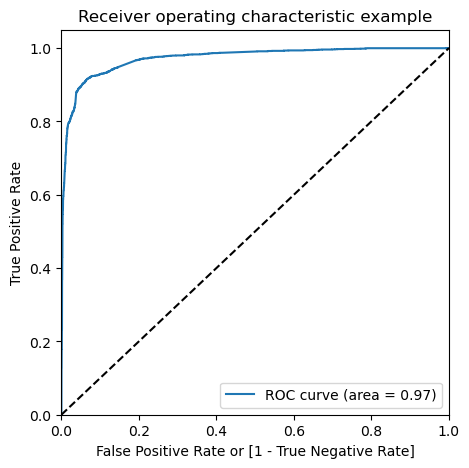

In [494]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.97 out of 1 which indicates a good predictive model

###  Finding Optimal Cutoff Point/ Probability
- It is that probability where we get `balanced sensitivity and specificity`

In [495]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.161605,4715,0,1,1,0,0,0,0,0,0,0,0
1,1,0.993020,7132,1,1,1,1,1,1,1,1,1,1,1
2,0,0.037264,8954,0,1,0,0,0,0,0,0,0,0,0
3,0,0.050562,5283,0,1,0,0,0,0,0,0,0,0,0
4,0,0.488737,3003,0,1,1,1,1,1,0,0,0,0,0


In [496]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.384045     1.000000     0.000000
0.1          0.1  0.833797     0.976248     0.744980
0.2          0.2  0.901051     0.935588     0.879518
0.3          0.3  0.923624     0.919887     0.925954
0.4          0.4  0.927335     0.905395     0.941014
0.5          0.5  0.930272     0.890902     0.954819
0.6          0.6  0.916357     0.835346     0.966867
0.7          0.7  0.911410     0.805556     0.977410
0.8          0.8  0.904607     0.775362     0.985191
0.9          0.9  0.882808     0.712963     0.988705


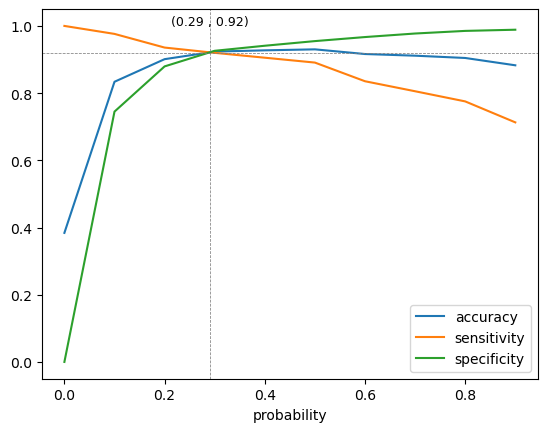

In [497]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['probability'], cutoff_df['sensitivity'], kind='linear')
acc_interp = interp1d(cutoff_df['probability'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['probability'], cutoff_df['specificity'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">INSIGHTS:</span></strong> 0.29 is the approx. point where all the curves meet, so 0.29 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [498]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.29 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.161605,4715,0
1,1,0.993020,7132,1
2,0,0.037264,8954,0
3,0,0.050562,5283,0
4,0,0.488737,3003,1


## Calculating all metrics using confusion matrix for Train

In [499]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))


0.9231601731601732


In [500]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [501]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("--"*30,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("--"*30,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("--"*30,"\n")

------------------------------------------------------------ 

Confusion Matrix
[[3683  301]
 [ 196 2288]] 

------------------------------------------------------------ 

True Negative                    :  3683
True Positive                    :  2288
False Negative                   :  196
False Positve                    :  301
Model Accuracy                   :  0.9232
Model Sensitivity                :  0.9211
Model Specificity                :  0.9244
Model Precision                  :  0.8837
Model Recall                     :  0.9211
Model True Positive Rate (TPR)   :  0.9211
Model False Positive Rate (FPR)  :  0.0756


------------------------------------------------------------ 



<strong><span style="color:Blue">INSIGHTS:</span></strong> 
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.29 the values in True Positive Rate ,Sensitivity, Recall are around 92%, which is much higher than the Business Objective.

### Adding Lead Score Feature to Training dataframe 
A higher score would mean that the lead is hot, i.e. is most likely to convert
Whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Lets add Lead Score 

In [502]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.161605,4715,0,16
1,1,0.993020,7132,1,99
2,0,0.037264,8954,0,4
3,0,0.050562,5283,0,5
4,0,0.488737,3003,1,49


## <strong><span style="color:brown">Making Predictions on test set </span></strong> 

### Scaling Test dataset

In [503]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4608 to 1160
Data columns (total 80 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   int64  
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 6   Lead Origin_Lead Add Form                             2772 non-null   uint8  
 7   Lead Origin_Lead Import                               2772 non-null   uint8  
 8   Lead Origin_Quick Add Form                            2

In [504]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4608,-0.428249,1,0,0,0,1,0,0,0,0,0,0,0,0
7935,0.805598,1,0,0,0,0,0,1,0,0,0,0,1,0
4043,-0.883879,1,0,0,0,0,0,1,0,0,0,0,1,0
7821,-0.298850,1,0,0,0,0,0,0,1,0,0,0,0,0
856,-0.521198,1,0,0,0,0,0,1,0,0,0,0,0,0


## Prediction on Test Dataset using final model 

In [505]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 15)

In [506]:
# making prediction using model 4 (final model)
y_test_pred = logm7.predict(X_test_sm)

In [507]:
y_test_pred[:10]

4608    0.988124
7935    0.061320
4043    0.013306
7821    0.004866
856     0.098338
927     0.053032
318     0.995713
1018    0.175832
8151    0.009135
1570    0.993535
dtype: float64

In [508]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4608,0.988124
7935,0.061320
4043,0.013306
7821,0.004866
856,0.098338


In [509]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4608,1
7935,0
4043,0
7821,0
856,0


In [510]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4608,0.988124
1,0,7935,0.061320
2,0,4043,0.013306
3,0,7821,0.004866
4,0,856,0.098338


In [511]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4608,1,0.988124
1,7935,0,0.061320
2,4043,0,0.013306
3,7821,0,0.004866
4,856,0,0.098338


In [512]:
# taking sensitivity-specificity method at 0.29 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.29 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4608,1,0.988124,1
1,7935,0,0.061320,0
2,4043,0,0.013306,0
3,7821,0,0.004866,0
4,856,0,0.098338,0


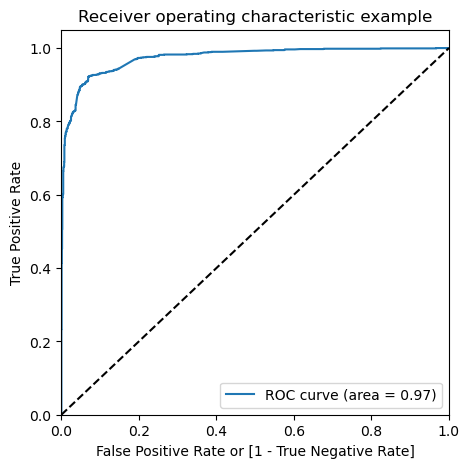

In [513]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:Blue">Insights:</span></strong> Area under ROC curve is 0.97 out of 1 which indicates a good predictive model

<strong><span style="color:Blue">NOTE:</span></strong> 
- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

In [514]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("--"*30,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("--"*30,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("--"*30,"\n")

------------------------------------------------------------ 

Confusion Matrix
[[1566  129]
 [  81  996]] 

------------------------------------------------------------ 

True Negative                    :  1566
True Positive                    :  996
False Negative                   :  81
False Positve                    :  129
Model Accuracy                   :  0.9242
Model Sensitivity                :  0.9248
Model Specificity                :  0.9239
Model Precision                  :  0.8853
Model Recall                     :  0.9248
Model True Positive Rate (TPR)   :  0.9248
Model False Positive Rate (FPR)  :  0.0761


------------------------------------------------------------ 



<strong><span style="color:Blue">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- `For Test set`
    - Accuracy : 92.42%
    - Sensitivity : 92.48%
    - Specificity : 92.39%
    
These matrics are very close to train set, so out final model logm4 is  performing with good consistency on both Train & Test set

In [515]:
# features and their coefficicent from final model
parameters=logm7.params.sort_values(ascending=False)
parameters

Tags_Closed by Horizzon                          8.982801
Tags_Lost to EINS                                8.581943
Tags_Will revert after reading the email         6.912348
Tags_Busy                                        3.072801
Tags_in touch with EINS                          2.810792
Tags_Others                                      2.432451
Lead Origin_Lead Add Form                        1.992976
Last Activity_SMS Sent                           1.959970
Total Time Spent on Website                      0.933865
Tags_Ringing                                    -0.880019
Lead Origin_Landing Page Submission             -0.911595
Tags_switched off                               -1.696914
Last Notable Activity_Modified                  -1.751596
Last Notable Activity_Olark Chat Conversation   -1.896413
const                                           -3.249956
dtype: float64

<strong><span style="color:Blue">NOTE:</span></strong> A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

## <strong><span> Adding `Lead Score` Feature to Test dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [518]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head(200)

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4608,1,0.988124,1,99
1,7935,0,0.061320,0,6
2,4043,0,0.013306,0,1
3,7821,0,0.004866,0,0
4,856,0,0.098338,0,10
5,927,0,0.053032,0,5
6,318,1,0.995713,1,100
7,1018,0,0.175832,0,18
8,8151,0,0.009135,0,1
9,1570,1,0.993535,1,99


<strong><span style="color:purple">Lead Score: </span></strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

# Conclusion 

### <strong><span >Train Data Set:</span></strong>            

- <strong><span>Accuracy:</span></strong> 92.32%

- <strong><span>Sensitivity:</span></strong> 92.11%

- <strong><span >Specificity:</span></strong> 92.44%

### <strong><span >Test Data Set:</span></strong> 

- <strong><span >Accuracy:</span></strong> 92.42%

- <strong><span >Sensitivity:</span></strong> 92.48%

- <strong><span>Specificity:</span></strong> 92.39%
 

<strong><span>Insights:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 92.11%` in the train set and 92.48% in the test set, using a cut-off value of 0.29.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%, but we have achieved it as 92.11`
- The model also achieved an accuracy of 92.42%, which is in line with the study's objectives.
<hr/>


## Model parameters
- The final Logistic Regression Model has 14 features

### <strong><span>`Top 3 features` that contributing `positively` to predicting hot leads in the model are:</span></strong> 
- <strong><span >Tags_Closed by Horizzon  </span></strong>

- <strong><span >Tags_Lost to EINS</span></strong> 

- <strong><span>Tags_Will revert after reading the email</span></strong> 

<strong><span>Insights: </span></strong> The Optimal cutoff probability point is 0.29.Converted probability greater than 0.29 will be predicted as Converted lead (Hot lead) & probability smaller than 0.29 will be predicted as not Converted lead (Cold lead).
<hr/>


# <strong><span>Recommendations</span></strong> 

### <strong><span>To increase our Lead Conversion Rates: </span></strong>  

- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Tags are important features to decide upon whom to contact for lead conversion.
- Optimize communication channels based on lead engagement impact.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.

### <strong><span style="color:purple">To identify areas of improvement: </span></strong>  

- Analyze negative coefficients in specialization offerings.
